In [1]:
%pip install tensorflow==2.12
%pip install numpy==1.24.3
%pip install matplotlib==3.7.1

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
Note: you ma

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers

2023-05-27 16:42:55.901703: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-27 16:42:58.206023: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Print versions
!python --version
print('Numpy ' + np.__version__)
print('TensorFlow ' + tf.__version__)
print('Keras ' + tf.keras.__version__)

Python 3.9.0
Numpy 1.24.3
TensorFlow 2.12.0
Keras 2.12.0


In [4]:
# Settings
nsamples = 1000     # Number of samples to use as a dataset
val_ratio = 0.2     # Percentage of samples that should be held for validation set
test_ratio = 0.2    # Percentage of samples that should be held for test set
tflite_model_name = 'sine_model'  # Will be given .tflite suffix
c_model_name = 'sine_model'       # Will be given .h suffix

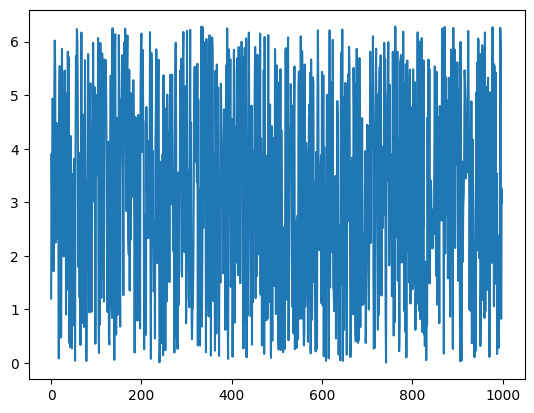

In [5]:
# Generate some random samples
np.random.seed(1234)
x_values = np.random.uniform(low=0, high=(2 * math.pi), size=nsamples)
plt.plot(x_values)

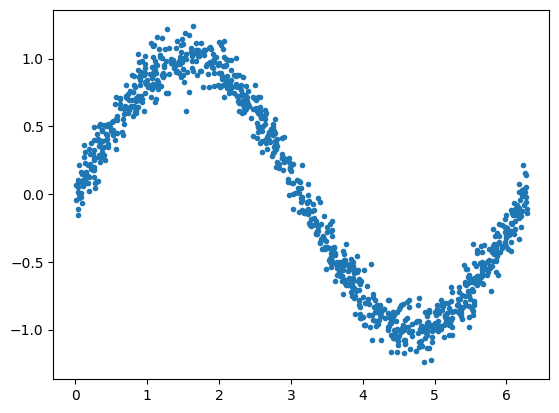

In [6]:
# Create a noisy sinewave with these values
y_values = np.sin(x_values) + (0.1 * np.random.randn(x_values.shape[0]))
plt.plot(x_values, y_values, '.')
     

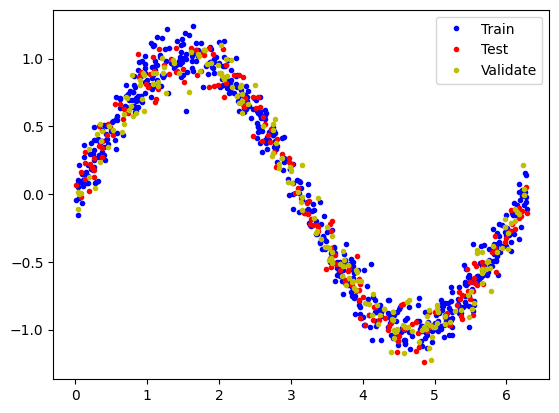

In [7]:
# Plit the dataset into training, validation, and test sets
val_split = int(val_ratio * nsamples)
test_split = int(val_split + (test_ratio * nsamples))
x_val, x_test, x_train = np.split(x_values, [val_split, test_split])
y_val, y_test, y_train = np.split(y_values, [val_split, test_split])

# Check that our splits add up correctly
assert(x_train.size + x_val.size + x_test.size) == nsamples

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_val, y_val, 'y.', label="Validate")
plt.legend()
plt.show()

In [8]:
# Create a model
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))

2023-05-27 16:43:14.448571: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [9]:
# View model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Add optimizer, loss function, and metrics to model and compile it
model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])

In [11]:
# Train model
history = model.fit(x_train,
                    y_train,
                    epochs=500,
                    batch_size=100,
                    validation_data=(x_val, y_val))

Epoch 1/500
6/6 [==============================] - 1s 64ms/step - loss: 0.8804 - mae: 0.8804 - val_loss: 0.8908 - val_mae: 0.8908
Epoch 2/500
6/6 [==============================] - 0s 8ms/step - loss: 0.8409 - mae: 0.8409 - val_loss: 0.8501 - val_mae: 0.8501
Epoch 3/500
6/6 [==============================] - 0s 7ms/step - loss: 0.8058 - mae: 0.8058 - val_loss: 0.8095 - val_mae: 0.8095
Epoch 4/500
6/6 [==============================] - 0s 9ms/step - loss: 0.7747 - mae: 0.7747 - val_loss: 0.7826 - val_mae: 0.7826
Epoch 5/500
6/6 [==============================] - 0s 9ms/step - loss: 0.7522 - mae: 0.7522 - val_loss: 0.7572 - val_mae: 0.7572
Epoch 6/500
6/6 [==============================] - 0s 8ms/step - loss: 0.7306 - mae: 0.7306 - val_loss: 0.7339 - val_mae: 0.7339
Epoch 7/500
6/6 [==============================] - 0s 8ms/step - loss: 0.7091 - mae: 0.7091 - val_loss: 0.7098 - val_mae: 0.7098
Epoch 8/500
6/6 [==============================] - 0s 11ms/step - loss: 0.6872 - mae: 0.6872 - v

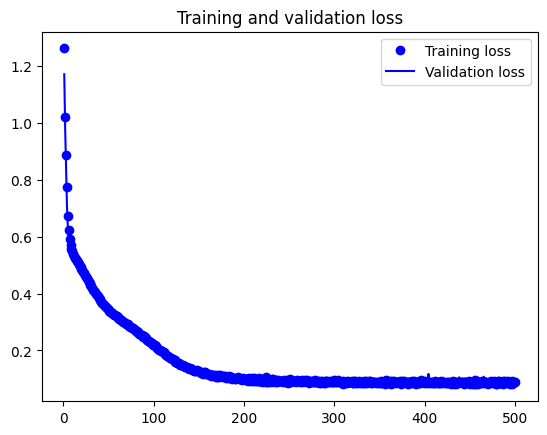

In [33]:
# Plot the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

7/7 [==============================] - 0s 3ms/step


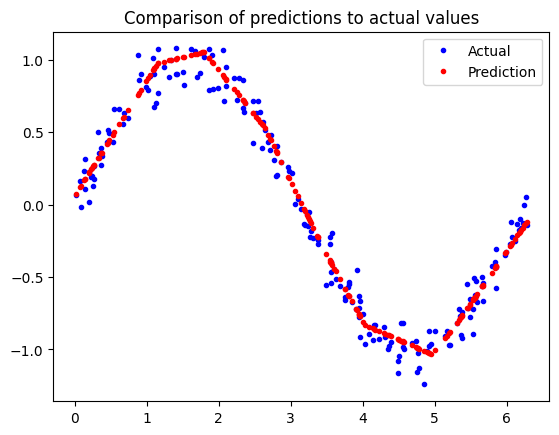

In [12]:
# Plot predictions against actual values
predictions = model.predict(x_test)

plt.clf()
plt.title("Comparison of predictions to actual values")
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Prediction')
plt.legend()
plt.show()

In [13]:
# Convert Keras model to a tflite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp4l40nf03/assets


INFO:tensorflow:Assets written to: /tmp/tmp4l40nf03/assets
2023-05-27 16:44:19.398218: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-05-27 16:44:19.398278: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-05-27 16:44:19.400239: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmp4l40nf03
2023-05-27 16:44:19.402365: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-05-27 16:44:19.402409: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmp4l40nf03
2023-05-27 16:44:19.410792: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2023-05-27 16:44:19.411845: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-05-27 16:44:19.459721: I tensorflow/cc/saved_model/loader.cc:215] Running initializatio

3168

In [14]:
print(tflite_model)

b'\x1c\x00\x00\x00TFL3\x14\x00 \x00\x1c\x00\x18\x00\x14\x00\x10\x00\x0c\x00\x00\x00\x08\x00\x04\x00\x14\x00\x00\x00\x1c\x00\x00\x00\x90\x00\x00\x00\xe8\x00\x00\x00\x04\x07\x00\x00\x14\x07\x00\x00\x0c\x0c\x00\x00\x03\x00\x00\x00\x01\x00\x00\x00\x10\x00\x00\x00\x00\x00\n\x00\x10\x00\x0c\x00\x08\x00\x04\x00\n\x00\x00\x00\x0c\x00\x00\x00\x1c\x00\x00\x008\x00\x00\x00\x0f\x00\x00\x00serving_default\x00\x01\x00\x00\x00\x04\x00\x00\x00\x98\xff\xff\xff\t\x00\x00\x00\x04\x00\x00\x00\x07\x00\x00\x00dense_2\x00\x01\x00\x00\x00\x04\x00\x00\x00\xc6\xf9\xff\xff\x04\x00\x00\x00\x0b\x00\x00\x00dense_input\x00\x02\x00\x00\x004\x00\x00\x00\x04\x00\x00\x00\xdc\xff\xff\xff\x0c\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00CONVERSION_METADATA\x00\x08\x00\x0c\x00\x08\x00\x04\x00\x08\x00\x00\x00\x0b\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00min_runtime_version\x00\r\x00\x00\x00\x18\x06\x00\x00\x10\x06\x00\x00\xc0\x05\x00\x00\xa4\x05\x00\x00T\x05\x00\x00\x04\x05\x00\x00\xf4\x00\x00\x00\xa4\x00\x00\x00\x9c\x00\x0

In [15]:
from tensorflow.lite.python.util import convert_bytes_to_c_source

source_text, header_text = convert_bytes_to_c_source(tflite_model,  "sine_model")

with  open('sine_model.h',  'w')  as  file:
    file.write(header_text)

with  open('sine_model.cc',  'w')  as  file:
    file.write(source_text)